# A max-flow/min-cut calculator

In [72]:
import networkx as nx
import matplotlib.pyplot as plt

In [73]:
G = nx.DiGraph()

In [74]:
G.add_nodes_from(['s', 'a', 'b', 'c', 'd', 't'])

In [75]:
G.add_edge('s','a', capacity=10)

In [76]:
G.add_edge('s','b', capacity=10)

In [77]:
G.add_edge('c','d', capacity=100)

In [78]:
G.add_edge('d','t', capacity=100)
G.add_edge('a','c', capacity=100)
G.add_edge('a','d', capacity=100)
G.add_edge('b','t', capacity=110)


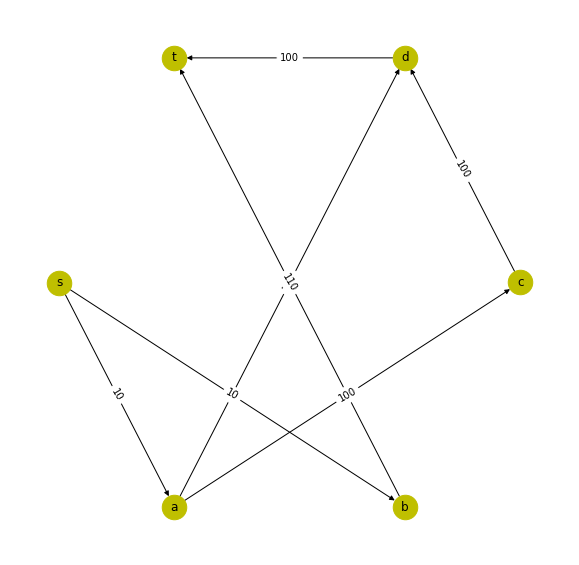

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

pos = nx.shell_layout(G)

nx.draw_networkx_edge_labels (G, pos, edge_labels=nx.get_edge_attributes(G, 'capacity'))

nx.draw(G, pos, ax, with_labels=True, node_size=600, node_color='y')

In [81]:
value, flow = nx.maximum_flow(G, 's', 't')

value, cut = nx.minimum_cut(G, 's', 't')


In [82]:
for i in flow:
    for j in flow[i]:
        G[i][j]['flow'] = flow[i][j]

In [83]:
G.edges(data=True)

OutEdgeDataView([('s', 'a', {'capacity': 10, 'flow': 10}), ('s', 'b', {'capacity': 10, 'flow': 10}), ('a', 'c', {'capacity': 100, 'flow': 0}), ('a', 'd', {'capacity': 100, 'flow': 10}), ('b', 't', {'capacity': 110, 'flow': 10}), ('c', 'd', {'capacity': 100, 'flow': 0}), ('d', 't', {'capacity': 100, 'flow': 10})])

In [84]:
edge_lab = {(i, j):[G[i][j]['flow'], 
               G[i][j]['capacity']] for i, j in G.edges()}

nodes_in_R = cut[0]
nodes_not_in_R = cut[1]

In [85]:
nodes_not_in_R

{'a', 'b', 'c', 'd', 't'}

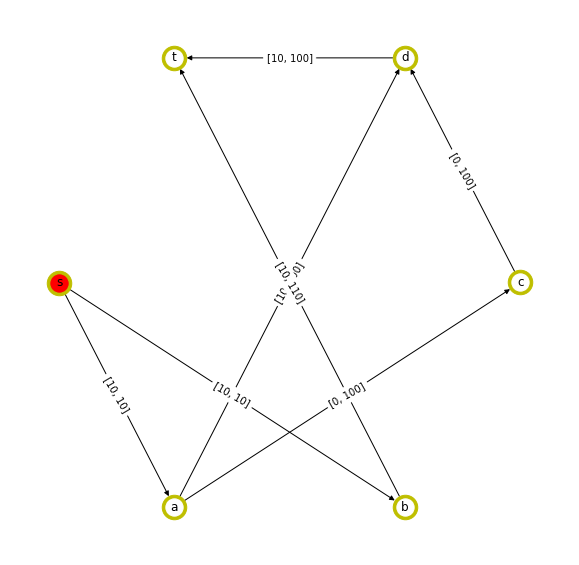

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

pos = nx.shell_layout(G)

nx.draw_networkx_edge_labels (G, pos, edge_labels=edge_lab)

nx.draw(G, pos, ax, with_labels=True, node_size=600, node_color='y')

nx.draw_networkx_nodes(G, pos, nodelist=nodes_in_R, node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=nodes_not_in_R, node_color='w')


